In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('Cells_sny_final.csv', sep=';', encoding='latin-1')

In [10]:
df

,Survey,CellID,Location,Area
0,1,18965,Riponne,Ville
1,1,26575,Riponne,Ville
2,1,10075,Riponne,Ville
3,1,10077,Riponne,Ville
4,1,18965,Riponne,Ville
...,...,...,...,...
5764,15,5250306,Bussigny,Périphérie
5765,15,5136144,Bussigny,Périphérie
5766,15,5315601,Bussigny,Périphérie
5767,15,5250322,Bussigny,Périphérie


In [11]:
df = df.drop(columns= 'Location')

In [12]:
summary = df.groupby(['Area','Survey'])

In [13]:
df_dummy = pd.DataFrame()
df_dummy

""


In [14]:
import numpy as np
for ind,item in enumerate(summary):
#     print(item[0][0],item[0][1],list(pd.Series(item[1]['CellID'])))
        df_dummy = df_dummy.append(pd.DataFrame([[np.max(np.array(item[1]['Survey'])),item[0][0],set(pd.Series(item[1]['CellID']))]]))
#     area.append(dct_area)
# # data = data.append(pd.DataFrame({'A': i}, index=[0]), ignore_index=True)

In [15]:
df_dummy = df_dummy.reset_index(drop= True)

In [18]:
area_list = df_dummy.iloc[:,1].unique()

In [19]:
#  take union of rows in a column , take union of successive items in column , take intersection of succsessive values in a column
import itertools
count = []
dec = 14
inc = 0
key_word = area_list[0]
for i,j in enumerate(df_dummy[0]):
    if j == 1:
        count.append(len(list(df_dummy.iloc[i,2])))

    elif df_dummy.iloc[i,1] == key_word and j!=1:

        h = df_dummy.iloc[inc:i,2]
        l = []
        for k in h:
            l.append(list(k))
        diff1 = set(list(itertools.chain.from_iterable(l)))
        diff2 = df_dummy.iloc[i,2]
        diff = len(diff1.difference(diff2))

        count.append(diff)
    else:

        key_word = df_dummy.iloc[i,1]

        inc = inc + 14
        h = df_dummy.iloc[inc:i,2]
        l = []
        for k in h:
            l.append(list(k))
        diff1 = set(list(itertools.chain.from_iterable(l)))
        diff2 = df_dummy.iloc[i,2]
        diff = len(diff1.difference(diff2))

        count.append(diff)


In [20]:
df_dummy["count"] = pd.Series(count)

In [21]:
df_dummy.columns = ['survey','area','cells','count']

In [22]:
df_dummy

,survey,area,cells,count
0,1,Campagne,"{5223168, 17421569, 5222913, 29571, 5223172, 5...",70
1,2,Campagne,"{5223168, 5222913, 17421569, 29571, 5223172, 1...",13
2,3,Campagne,"{5223168, 5222913, 17421569, 29571, 5223172, 1...",18
3,4,Campagne,"{5223168, 5222913, 17421569, 29571, 5223172, 1...",23
4,5,Campagne,"{5223168, 5222913, 17421569, 29571, 5223172, 5...",25
5,6,Campagne,"{5223168, 5222913, 17421569, 29571, 5223172, 1...",28
6,7,Campagne,"{5223168, 17421569, 5222913, 29571, 10993156, ...",32
7,8,Campagne,"{5223168, 17421569, 5222913, 29571, 5223172, 5...",34
8,9,Campagne,"{5223424, 17421569, 5222913, 29571, 5223172, 5...",30
9,10,Campagne,"{5223168, 17421569, 5222913, 29571, 5223172, 4...",37


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


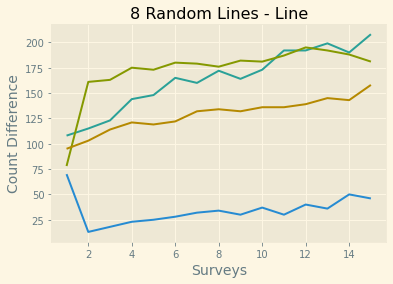

In [43]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.arange(1, 16)
print(x)
with plt.style.context('Solarize_Light2'):
    plt.plot(x, df_dummy.loc[0:14,'count'])
    plt.plot(x, df_dummy.loc[15:29,'count'])
    plt.plot(x, df_dummy.loc[30:44,'count'])
    plt.plot(x, df_dummy.loc[45:59,'count'])
#     plt.plot(x, )
#     plt.plot(x, )
#     plt.plot(x, )
    # Number of accent colors in the color scheme
    plt.title('8 Random Lines - Line')
    plt.xlabel('Surveys', fontsize=14)
    plt.ylabel('Count Difference', fontsize=14)

plt.show()
